<a href="https://colab.research.google.com/github/PSN-01/Travel-Graph-UDLAP/blob/main/grafo_udlap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Travel Graph: UDLAP***

# ***Made by:***



*   Pablo Silva Noreña (Main developer: Lead Coder - Project Designer)
*   Triana Flores Macip (Main developer: Coder - Data frame - Project Designer)

In [1]:
!pip install geopandas
!pip install shapely
!pip install networkx
!pip install matplotlib
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.1 MB/s eta 0:00:00


In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time
import heapq
import numpy as np

In [ ]:
print(ox.__version__)

2.0.2


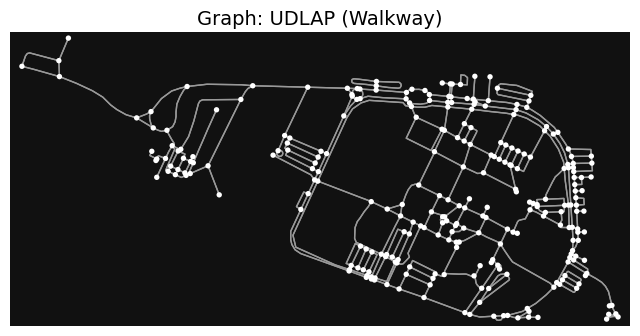

In [3]:
graph_place = ox.graph_from_place(

    "Universidad de las Américas Puebla, Cholula, PUebla, México",
    network_type = "walk"

)

fig, ax = ox.plot_graph(graph_place, show = False, close  = False)
ax.set_title("Graph: UDLAP (Walkway)", fontsize = 14, color = "black")

plt.show()

# ***Link to the csv download link, please download as CVS file, in order to run the final code:***

[https://docs.google.com/spreadsheets/d/1PtWpKMK4ARQ-2RwRpOw9xpWH7ZLZHKoFWSaeCN5nV10/edit?usp=sharing]

**instructions to load a csv in read me file in repository**

[https://github.com/PSN-01/Travel-Graph-UDLAP]





In [7]:
path = r"/content/nodos_udlap_f - Hoja 1 (1).csv" # CHANGE YOUR PATH!!!
df = pd.read_csv(path)
df

,Vertice,Lugar,Latitud,Longitud
0,1,Entrada Periferico,19.051321,-98.279033
1,2,Entrada Recta,19.056890,-98.283860
2,3,Biblioteca,19.054540,-98.283060
3,4,Edificio ingenieria,19.054280,-98.281910
4,5,Edificio Ciencias,19.053850,-98.282030
5,6,Edificio Humanidades,19.053300,-98.280530
6,7,Gimnasio,19.054320,-98.287670
7,8,Residencial Profesores,19.057924,-98.292179
8,9,Colegio Gaos,19.051447,-98.285328
9,10,Colegio Ray,19.053486,-98.284874


# ***Final Graph:***


--- List of available nodes ---

 Vertice                       Lugar   Latitud   Longitud
       1          Entrada Periferico 19.051321 -98.279033
       2               Entrada Recta 19.056890 -98.283860
       3                  Biblioteca 19.054540 -98.283060
       4         Edificio ingenieria 19.054280 -98.281910
       5           Edificio Ciencias 19.053850 -98.282030
       6        Edificio Humanidades 19.053300 -98.280530
       7                    Gimnasio 19.054320 -98.287670
       8      Residencial Profesores 19.057924 -98.292179
       9                Colegio Gaos 19.051447 -98.285328
      10                 Colegio Ray 19.053486 -98.284874
      11                Colegio Cain 19.054720 -98.284110
      12              Colegio Bernal 19.051500 -98.280280
      13                     Comedor 19.054980 -98.283990
      14                   Auditorio 19.053643 -98.282799
      15            Campo Sintentico 19.055530 -98.280120
      16           Edificio Negocios 1

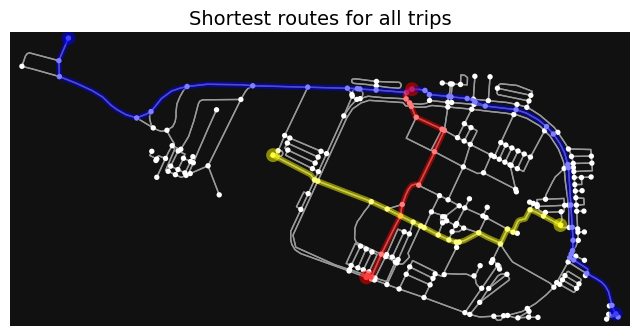

In [8]:
route_colors = ["blue", "red", "yellow", "green", "orange", "purple", "cyan", "magenta"]
walk_speed_kph = 5

for u, v, k, data in graph_place.edges(keys=True, data=True):
    data["speed_kph"] = walk_speed_kph

graph_place = ox.add_edge_travel_times(graph_place)

print("\n--- List of available nodes ---\n")
print(df.to_string(index=False))

fig, ax = ox.plot_graph(graph_place, show=False, close=False)

def dijkstra(graph, source, target, weight="length"):
    dist = {node: float("inf") for node in graph.nodes}
    prev = {node: None for node in graph.nodes}
    dist[source] = 0

    queue = [(0, source)]
    visited = set()

    while queue:
        curr_dist, u = heapq.heappop(queue)
        if u in visited:
            continue
        visited.add(u)
        if u == target:
            break
        for v in graph.successors(u):
            edge_dict = graph.get_edge_data(u, v)
            for key in edge_dict:
                data = edge_dict[key]
                alt = dist[u] + data.get(weight, 1)
                if alt < dist[v]:
                    dist[v] = alt
                    prev[v] = u
                    heapq.heappush(queue, (alt, v))

    path = []
    u = target
    while u is not None:
        path.insert(0, u)
        u = prev[u]
    return path

trip_num = 1
color_index = 0

while True:
    make_trip = input("\nDo you want to make a trip? (yes/no): ").strip().lower()
    if make_trip not in ["yes", "y"]:
        print("\nBYEE!")
        break

    print(f"\n--- TRIP {trip_num} ---")
    orig_id = int(input("Enter the origin vertex ID: "))
    dest_id = int(input("Enter the destination vertex ID: "))

    orig_row = df[df["Vertice"] == orig_id].iloc[0]
    dest_row = df[df["Vertice"] == dest_id].iloc[0]

    orig_x, orig_y = orig_row["Longitud"], orig_row["Latitud"]
    dest_x, dest_y = dest_row["Longitud"], dest_row["Latitud"]

    origin_name = orig_row["Lugar"]
    destination_name = dest_row["Lugar"]

    orig = ox.distance.nearest_nodes(graph_place, X=orig_x, Y=orig_y)
    dest = ox.distance.nearest_nodes(graph_place, X=dest_x, Y=dest_y)

    route = dijkstra(graph_place, orig, dest, weight="length")

    total_length = 0
    total_time = 0
    longest_segment = (0, None, None, 0)

    print(f"\nRoute from {origin_name} to {destination_name}:\n")

    for i, (u, v) in enumerate(zip(route[:-1], route[1:]), start=1):
        edge_data = graph_place.get_edge_data(u, v)
        if edge_data is None:
            continue
        data = list(edge_data.values())[0]
        length = data["length"]
        speed = data["speed_kph"]
        travel_time = data["travel_time"]

        print(f"Segment {i} | Distance: {length:.2f} m | Speed: {speed} km/h | Time: {travel_time:.2f} s")

        if length > longest_segment[3]:
            longest_segment = (i, u, v, length)

        total_length += length
        total_time += travel_time

    print(f"\nTrip summary {trip_num}:")
    print(f"From: {origin_name}")
    print(f"To: {destination_name}")
    print(f"Total distance: {total_length:.2f} meters")
    print(f"Estimated time: {total_time:.2f} seconds ({total_time/60:.2f} minutes)")
    print(f"Longest segment: Segment {longest_segment[0]} | {longest_segment[3]:.2f} m")

    color = route_colors[color_index % len(route_colors)]
    color_index += 1

    ox.plot_graph_route(graph_place, route, route_color=color, route_linewidth=4, ax=ax, show=False, close=False)

    trip_num += 1

plt.title("Shortest routes for all trips", fontsize=14)
plt.show()
